In [16]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.random import RandomClustering
from src.clustering.louvain import LouvainClustering
from src.clustering.greedy import GreedyClustering

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Number of periods: 6
(5, 5)


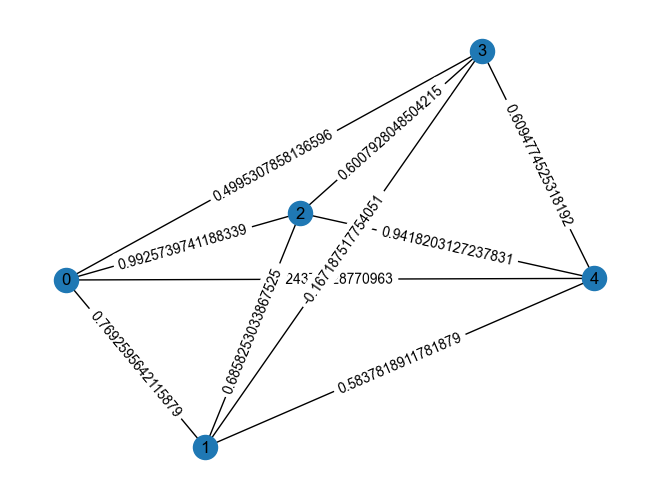

In [18]:
T = 15

# Load data from a JSONL file
market = Market.from_jsonl("./tick_data.jsonl", start_date="2022/12/31", end_date="2023/01/03")

# Get periods of length 15
periods = market.get_periods(period_length=3600)
print(f"Number of periods: {len(periods)}")

corr = market.compute_correlation_matrix_inter(3600)
print(corr.shape)
# Build the graph
state_graph = market.build_graph(3600, 0, inter=True)

clustering = LouvainClustering().fit(periods, G=state_graph)

In [19]:
print(periods)

[Period(start=1672560000.0, end=1672563600.0, stocks=['AAPL'], tick_data=[Tick(timestamp=1672561800, stock='AAPL', bid_price=150.83, bid_volume=592, ask_price=151.21, ask_volume=1090, trade_price=151.13, trade_volume=757)]), Period(start=1672563600.0, end=1672567200.0, stocks=['AAPL'], tick_data=[Tick(timestamp=1672565400, stock='AAPL', bid_price=150.96, bid_volume=824, ask_price=151.39, ask_volume=1186, trade_price=151.26, trade_volume=522)]), Period(start=1672570800.0, end=1672574400.0, stocks=['AAPL'], tick_data=[Tick(timestamp=1672572600, stock='AAPL', bid_price=149.77, bid_volume=812, ask_price=150.21, ask_volume=634, trade_price=150.05, trade_volume=506)]), Period(start=1672574400.0, end=1672578000.0, stocks=['AAPL'], tick_data=[Tick(timestamp=1672576200, stock='AAPL', bid_price=149.04, bid_volume=908, ask_price=149.3, ask_volume=828, trade_price=149.12, trade_volume=852)]), Period(start=1672578000.0, end=1672581600.0, stocks=['AAPL'], tick_data=[Tick(timestamp=1672579800, stock=

In [20]:
# Get the clusters
clusters = clustering.clusters

print(f"Number of periods: {len(periods)}")
print(f"Number of clusters: {len(clusters)}")
print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
print(f"Cluster labels: {clustering.labels}")
#print(f"Cluster centers: {clustering.cluster_centers}")
print(f"Transition matrix: \n{clustering.transition_matrix}")

Number of periods: 6
Number of clusters: 1
Cluster sizes: [5]
Cluster labels: [0 0 0 0 0]
Transition matrix: 
[[1.]]


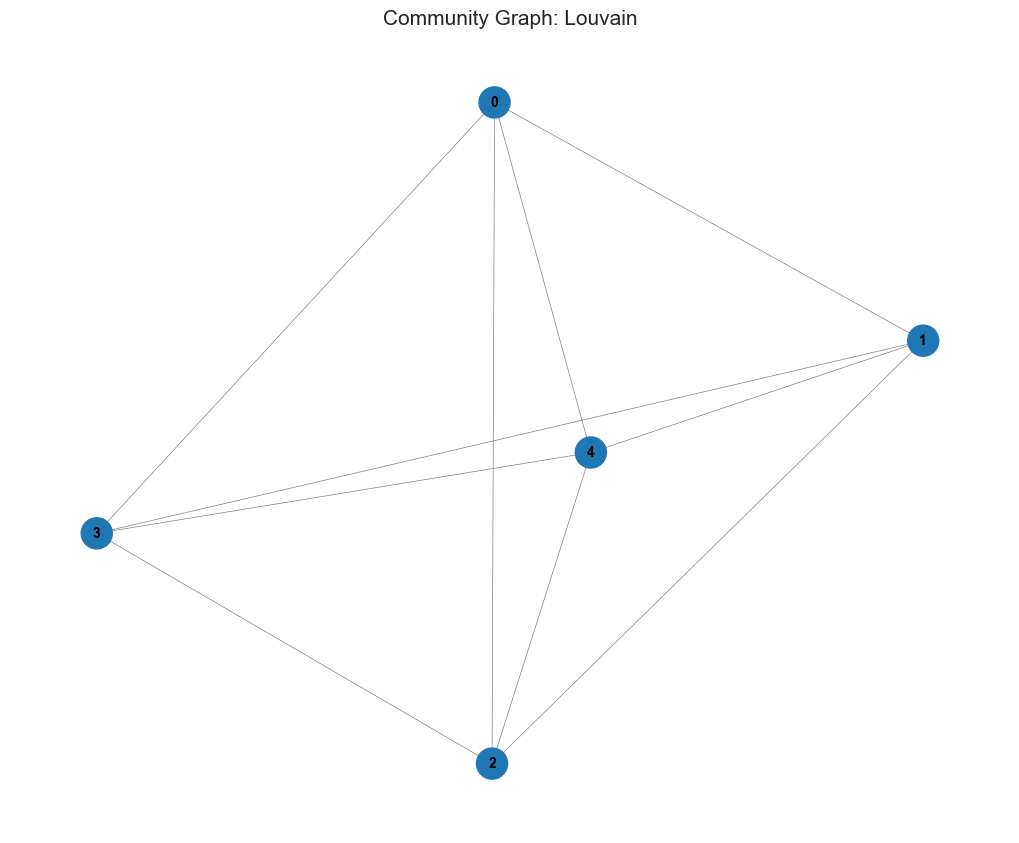

In [21]:
clustering.plot_community_graph(state_graph, method='Louvain')

In [22]:
print(periods)

[Period(start=1672560000.0, end=1672563600.0, stocks=['AAPL'], tick_data=[Tick(timestamp=1672561800, stock='AAPL', bid_price=150.83, bid_volume=592, ask_price=151.21, ask_volume=1090, trade_price=151.13, trade_volume=757)]), Period(start=1672563600.0, end=1672567200.0, stocks=['AAPL'], tick_data=[Tick(timestamp=1672565400, stock='AAPL', bid_price=150.96, bid_volume=824, ask_price=151.39, ask_volume=1186, trade_price=151.26, trade_volume=522)]), Period(start=1672570800.0, end=1672574400.0, stocks=['AAPL'], tick_data=[Tick(timestamp=1672572600, stock='AAPL', bid_price=149.77, bid_volume=812, ask_price=150.21, ask_volume=634, trade_price=150.05, trade_volume=506)]), Period(start=1672574400.0, end=1672578000.0, stocks=['AAPL'], tick_data=[Tick(timestamp=1672576200, stock='AAPL', bid_price=149.04, bid_volume=908, ask_price=149.3, ask_volume=828, trade_price=149.12, trade_volume=852)]), Period(start=1672578000.0, end=1672581600.0, stocks=['AAPL'], tick_data=[Tick(timestamp=1672579800, stock=

2023-01-01 10:00:00 10.0
2023-01-01 12:00:00 12.0
2023-01-01 13:00:00 13.0
2023-01-01 14:00:00 14.0
2023-01-01 15:00:00 15.0


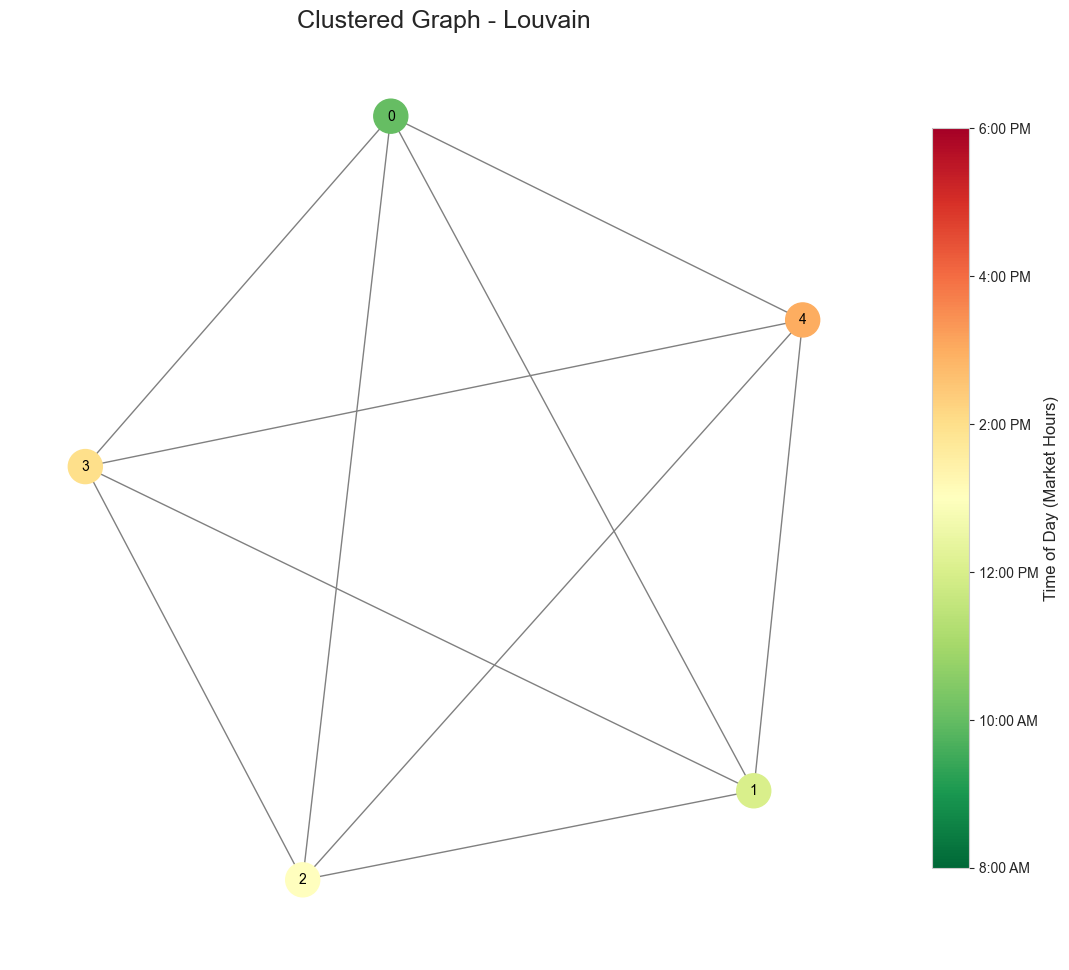

In [25]:
clustering.plot_cluster(method='Louvain')

AttributeError: 'Period' object has no attribute 'ssv'

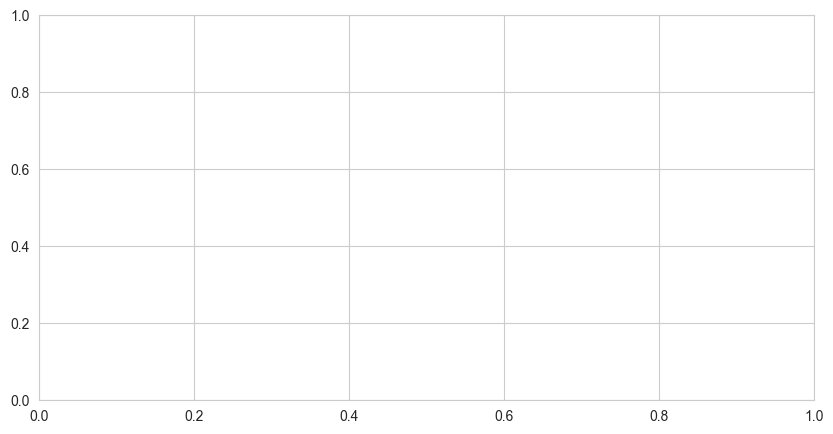

In [26]:
clustering.plot_ssv()